<a href="https://colab.research.google.com/github/Sai25Hajime/CognifyZTech_Level2_Task1/blob/main/CognifyZTech_Level2_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting the Google Drive

First we mount the google drive since that is where the dataset will be stored.

In [2]:
#Both are used to import the drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

Importing libraries is standard practice when coding or working with datasets. In this case we are importing the Pandas, MatPlotlib and Seaborn libraries. We are also importing the display libraries.

In [3]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

Now we load the dataset. Since we have uploaded it from Google Drive. We need to put that path instead of the local path.

In [4]:
# Load the dataset
file_path = "/content/drive/MyDrive/Datasets/cognifyz_dataset.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Displaying the Rows

First we will display few rows to get an idea of the dataset.

In [5]:
# Display the first few rows
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Calculating the Percentage of Restaurants that offer table booking and online delivery

First we calculate the percentage of restaurants that offer table booking and online delivery

In [6]:
### 1. Percentage of Restaurants Offering Table Booking & Online Delivery ###


table_booking_percentage = (df['Has Table booking'].str.lower() == 'yes').mean() * 100
online_delivery_percentage = (df['Has Online delivery'].str.lower() == 'yes').mean() * 100

print(f"📌 Percentage of restaurants offering table booking: {table_booking_percentage:.2f}%")
print(f"📌 Percentage of restaurants offering online delivery: {online_delivery_percentage:.2f}%")

📌 Percentage of restaurants offering table booking: 12.12%
📌 Percentage of restaurants offering online delivery: 25.66%


# Comparing the Average Rating of Restaurants

Next, we compare the average ratings of restaurants. One with table booking and another one without table booking.

In [7]:
### 2. Compare Average Ratings of Restaurants with & without Table Booking ###

avg_rating_with_table = df[df['Has Table booking'].str.lower() == 'yes']['Aggregate rating'].mean()
avg_rating_without_table = df[df['Has Table booking'].str.lower() == 'no']['Aggregate rating'].mean()

print(f"⭐ Average rating of restaurants with Table Booking: {avg_rating_with_table:.2f}")
print(f"⭐ Average rating of restaurants without Table Booking: {avg_rating_without_table:.2f}")

⭐ Average rating of restaurants with Table Booking: 3.44
⭐ Average rating of restaurants without Table Booking: 2.56


# Plot the Average Ratings

Now we plot the average ratings of the restaurants using Matplotlib.

<ipython-input-8-f7fb55af3cf1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['With Table Booking', 'Without Table Booking'], y=[avg_rating_with_table, avg_rating_without_table], palette="coolwarm")


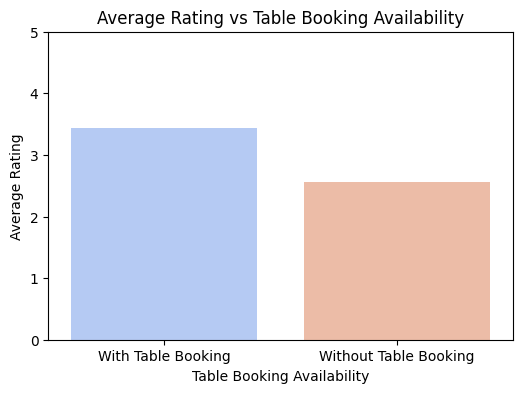

In [8]:
# Visualizing the difference
plt.figure(figsize=(6, 4))
sns.barplot(x=['With Table Booking', 'Without Table Booking'], y=[avg_rating_with_table, avg_rating_without_table], palette="coolwarm")
plt.xlabel("Table Booking Availability")
plt.ylabel("Average Rating")
plt.title("Average Rating vs Table Booking Availability")
plt.ylim(0, 5)  # Assuming ratings are between 0-5
plt.show()

# Checking Online Delivery

Now we are checking the availability of online delivery across different price ranges using Group By function.

In [9]:
### 3. Online Delivery Availability Across Different Price Ranges ###

online_delivery_distribution = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100


# Plot the Online Delivery Availability

Now we plot the availability of online delivery of the restaurants using Matplotlib.

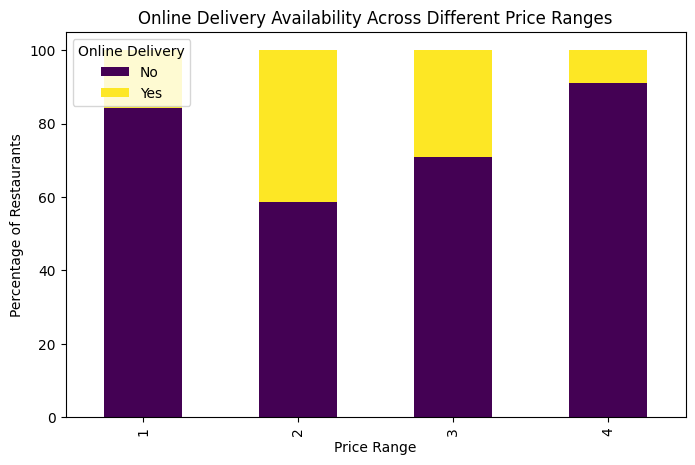

In [10]:
# Visualizing the online delivery availability by price range
online_delivery_distribution.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
plt.xlabel("Price Range")
plt.ylabel("Percentage of Restaurants")
plt.title("Online Delivery Availability Across Different Price Ranges")
plt.legend(title="Online Delivery", labels=["No", "Yes"])
plt.show()